# **Stacked Charts**


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


In [1]:
# Lab 22: Stacked Charts

## Setup: Downloading and Loading the Data
**Install the libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

### Step 1: Download the dataset


In [4]:
#  !wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

### Step 2: Import necessary libraries and load the dataset


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# 
# Connect to the SQLite database
#

In [8]:
conn = sqlite3.connect('survey-data.sqlite')

In [9]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


In [10]:
df

COUNT(*)
0     65437

In [11]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [12]:
QUERY = """
SELECT distinct Age, JobSatPoints_6, JobSatPoints_7
FROM main 
WHERE NOT JobSatPoints_6 = 'NaN'
  AND NOT JobSatPoints_7 = 'NaN'
  AND NOT Age =  'Prefer not to say'
"""

df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  JobSatPoints_6  JobSatPoints_7
0     35-44 years old             0.0             0.0
1     35-44 years old            25.0            10.0
2     35-44 years old            30.0             0.0
3     45-54 years old             0.0             0.0
4     25-34 years old            60.0            10.0
...               ...             ...             ...
2388  45-54 years old            70.0            65.0
2389  25-34 years old            15.0            33.0
2390  25-34 years old            99.0            65.0
2391  35-44 years old            22.0             8.0
2392  45-54 years old            63.0             2.0

[2393 rows x 3 columns]


In [13]:
QUERY = """
SELECT Age, JobSatPoints_6, JobSatPoints_7, COUNT(*) as count 
FROM main
WHERE NOT JobSatPoints_6 = 'NaN'
  AND NOT JobSatPoints_7 = 'NaN'
  AND NOT Age =  'Prefer not to say'  
GROUP BY Age, JobSatPoints_6, JobSatPoints_7
ORDER BY Age, JobSatPoints_6, JobSatPoints_7
"""

df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                     Age  JobSatPoints_6  JobSatPoints_7  count
0        18-24 years old             0.0             0.0   1205
1        18-24 years old             0.0             1.0      2
2        18-24 years old             0.0             2.0      1
3        18-24 years old             0.0             3.0      3
4        18-24 years old             0.0             4.0      1
...                  ...             ...             ...    ...
2388  Under 18 years old            70.0            60.0      1
2389  Under 18 years old            70.0            90.0      1
2390  Under 18 years old            75.0            95.0      1
2391  Under 18 years old            80.0            80.0      1
2392  Under 18 years old           100.0           100.0      3

[2393 rows x 4 columns]


In [14]:

df_age = pd.read_sql_query(QUERY, conn)
# print(df_age)
df_age

Age  JobSatPoints_6  JobSatPoints_7  count
0        18-24 years old             0.0             0.0   1205
1        18-24 years old             0.0             1.0      2
2        18-24 years old             0.0             2.0      1
3        18-24 years old             0.0             3.0      3
4        18-24 years old             0.0             4.0      1
...                  ...             ...             ...    ...
2388  Under 18 years old            70.0            60.0      1
2389  Under 18 years old            70.0            90.0      1
2390  Under 18 years old            75.0            95.0      1
2391  Under 18 years old            80.0            80.0      1
2392  Under 18 years old           100.0           100.0      3

[2393 rows x 4 columns]

In [15]:
QUERY = """
SELECT Age, sum(JobSatPoints_6), sum(JobSatPoints_7) 
FROM main
WHERE NOT JobSatPoints_6 = 'NaN'
  AND NOT JobSatPoints_7 = 'NaN'
  AND NOT Age =  'Prefer not to say'  
GROUP BY Age --, JobSatPoints_6, JobSatPoints_7
ORDER BY Age --, JobSatPoints_6, JobSatPoints_7
"""

df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  sum(JobSatPoints_6)  sum(JobSatPoints_7)
0     18-24 years old            109908.50           120599.000
1     25-34 years old            329122.33           304157.080
2     35-44 years old            187695.35           167573.725
3     45-54 years old             62341.00            58782.000
4     55-64 years old             22220.00            20038.000
5   65 years or older              2832.00             2635.000
6  Under 18 years old              1372.00             1563.000


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



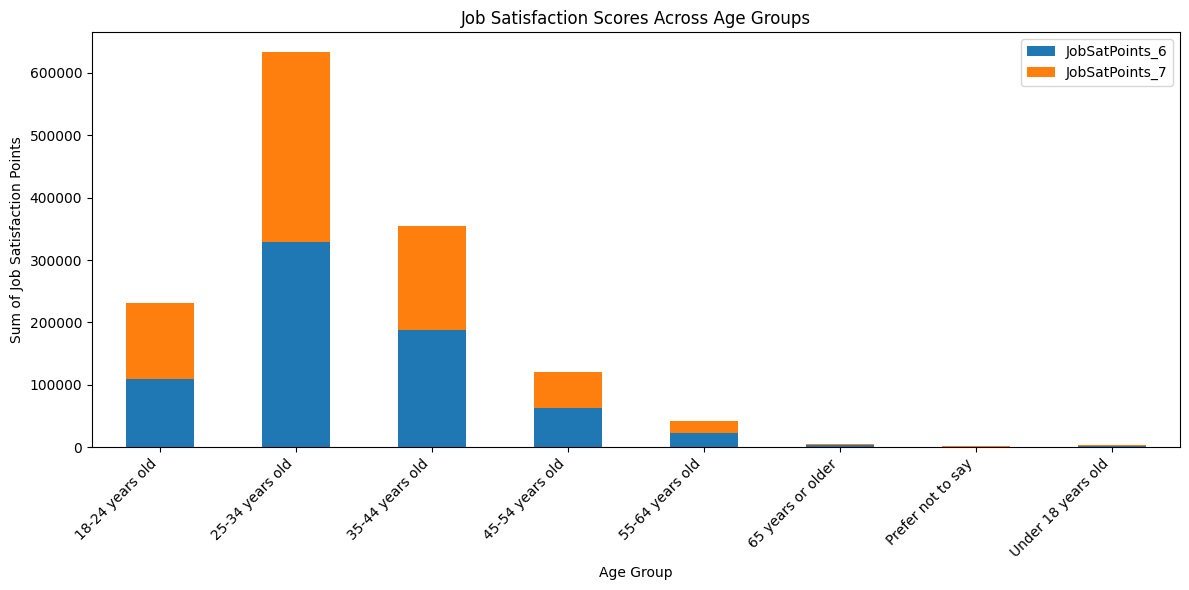

In [16]:
##Write your code here 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data and prepare for stacked chart
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by age and calculate sums
age_job_sat = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# Create stacked bar chart
age_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 1.2 Stacked Chart of JobSatPoints_6 and JobSatPoints_7 for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [17]:
QUERY = """
SELECT Employment, sum(JobSatPoints_6), sum(JobSatPoints_7) 
FROM main
WHERE NOT JobSatPoints_6 = 'NaN'
  AND NOT JobSatPoints_7 = 'NaN'
  AND NOT Employment =  'Prefer not to say'  
GROUP BY Employment --, JobSatPoints_6, JobSatPoints_7
ORDER BY Employment --, JobSatPoints_6, JobSatPoints_7
"""

df_Employment = pd.read_sql_query(QUERY, conn)
print(df_Employment)

                                           Employment  sum(JobSatPoints_6)  \
0                                 Employed, full-time            554333.63   
1             Employed, full-time;Employed, part-time              3227.00   
2   Employed, full-time;Independent contractor, fr...             55902.05   
3   Employed, full-time;Independent contractor, fr...              4009.00   
4   Employed, full-time;Independent contractor, fr...                15.00   
..                                                ...                  ...   
59  Student, full-time;Independent contractor, fre...               160.00   
60  Student, full-time;Not employed, but looking f...                 8.00   
61  Student, full-time;Not employed, but looking f...               240.00   
62  Student, full-time;Student, part-time;Employed...                 0.00   
63             Student, part-time;Employed, part-time              5617.00   

    sum(JobSatPoints_7)  
0            514811.380  
1          

In [18]:
df_Employment

Employment  sum(JobSatPoints_6)  \
0                                 Employed, full-time            554333.63   
1             Employed, full-time;Employed, part-time              3227.00   
2   Employed, full-time;Independent contractor, fr...             55902.05   
3   Employed, full-time;Independent contractor, fr...              4009.00   
4   Employed, full-time;Independent contractor, fr...                15.00   
..                                                ...                  ...   
59  Student, full-time;Independent contractor, fre...               160.00   
60  Student, full-time;Not employed, but looking f...                 8.00   
61  Student, full-time;Not employed, but looking f...               240.00   
62  Student, full-time;Student, part-time;Employed...                 0.00   
63             Student, part-time;Employed, part-time              5617.00   

    sum(JobSatPoints_7)  
0            514811.380  
1              3675.000  
2             54103.425  
3              4003.000  
4                15.000  
..                  ...  
59              180.000  
60                8.000  
61              338.000  
62                0.000  
63             5790.000  

[64 rows x 3 columns]

In [19]:
# 就業狀況的 JobSatPoints_6 和 JobSatPoints_7 堆疊圖表
#
# 建立一個堆積圖來比較不同就業狀態下的工作滿意度（JobSatPoints_6 和 JobSatPoints_7）。
# 這將顯示出滿意度如何因就業類型而異。
#

In [20]:
df = pd.read_csv("survey-data.csv")

# Clean data and prepare for stacked chart
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by employment status and calculate sums
employment_job_sat = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

employment_job_sat

JobSatPoints_6  \
Employment                                                           
Employed, full-time                                      554333.63   
Employed, full-time;Employed, part-time                    3227.00   
Employed, full-time;Independent contractor, fre...        55902.05   
Employed, full-time;Independent contractor, fre...         4009.00   
Employed, full-time;Independent contractor, fre...           15.00   
...                                                            ...   
Student, full-time;Independent contractor, free...          160.00   
Student, full-time;Not employed, but looking fo...            8.00   
Student, full-time;Not employed, but looking fo...          240.00   
Student, full-time;Student, part-time;Employed,...            0.00   
Student, part-time;Employed, part-time                     5617.00   

                                                    JobSatPoints_7  
Employment                                                          
Employed, full-time                                     514811.380  
Employed, full-time;Employed, part-time                   3675.000  
Employed, full-time;Independent contractor, fre...       54103.425  
Employed, full-time;Independent contractor, fre...        4003.000  
Employed, full-time;Independent contractor, fre...          15.000  
...                                                            ...  
Student, full-time;Independent contractor, free...         180.000  
Student, full-time;Not employed, but looking fo...           8.000  
Student, full-time;Not employed, but looking fo...         338.000  
Student, full-time;Student, part-time;Employed,...           0.000  
Student, part-time;Employed, part-time                    5790.000  

[64 rows x 2 columns]

/tmp/ipykernel_1499/3723377303.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


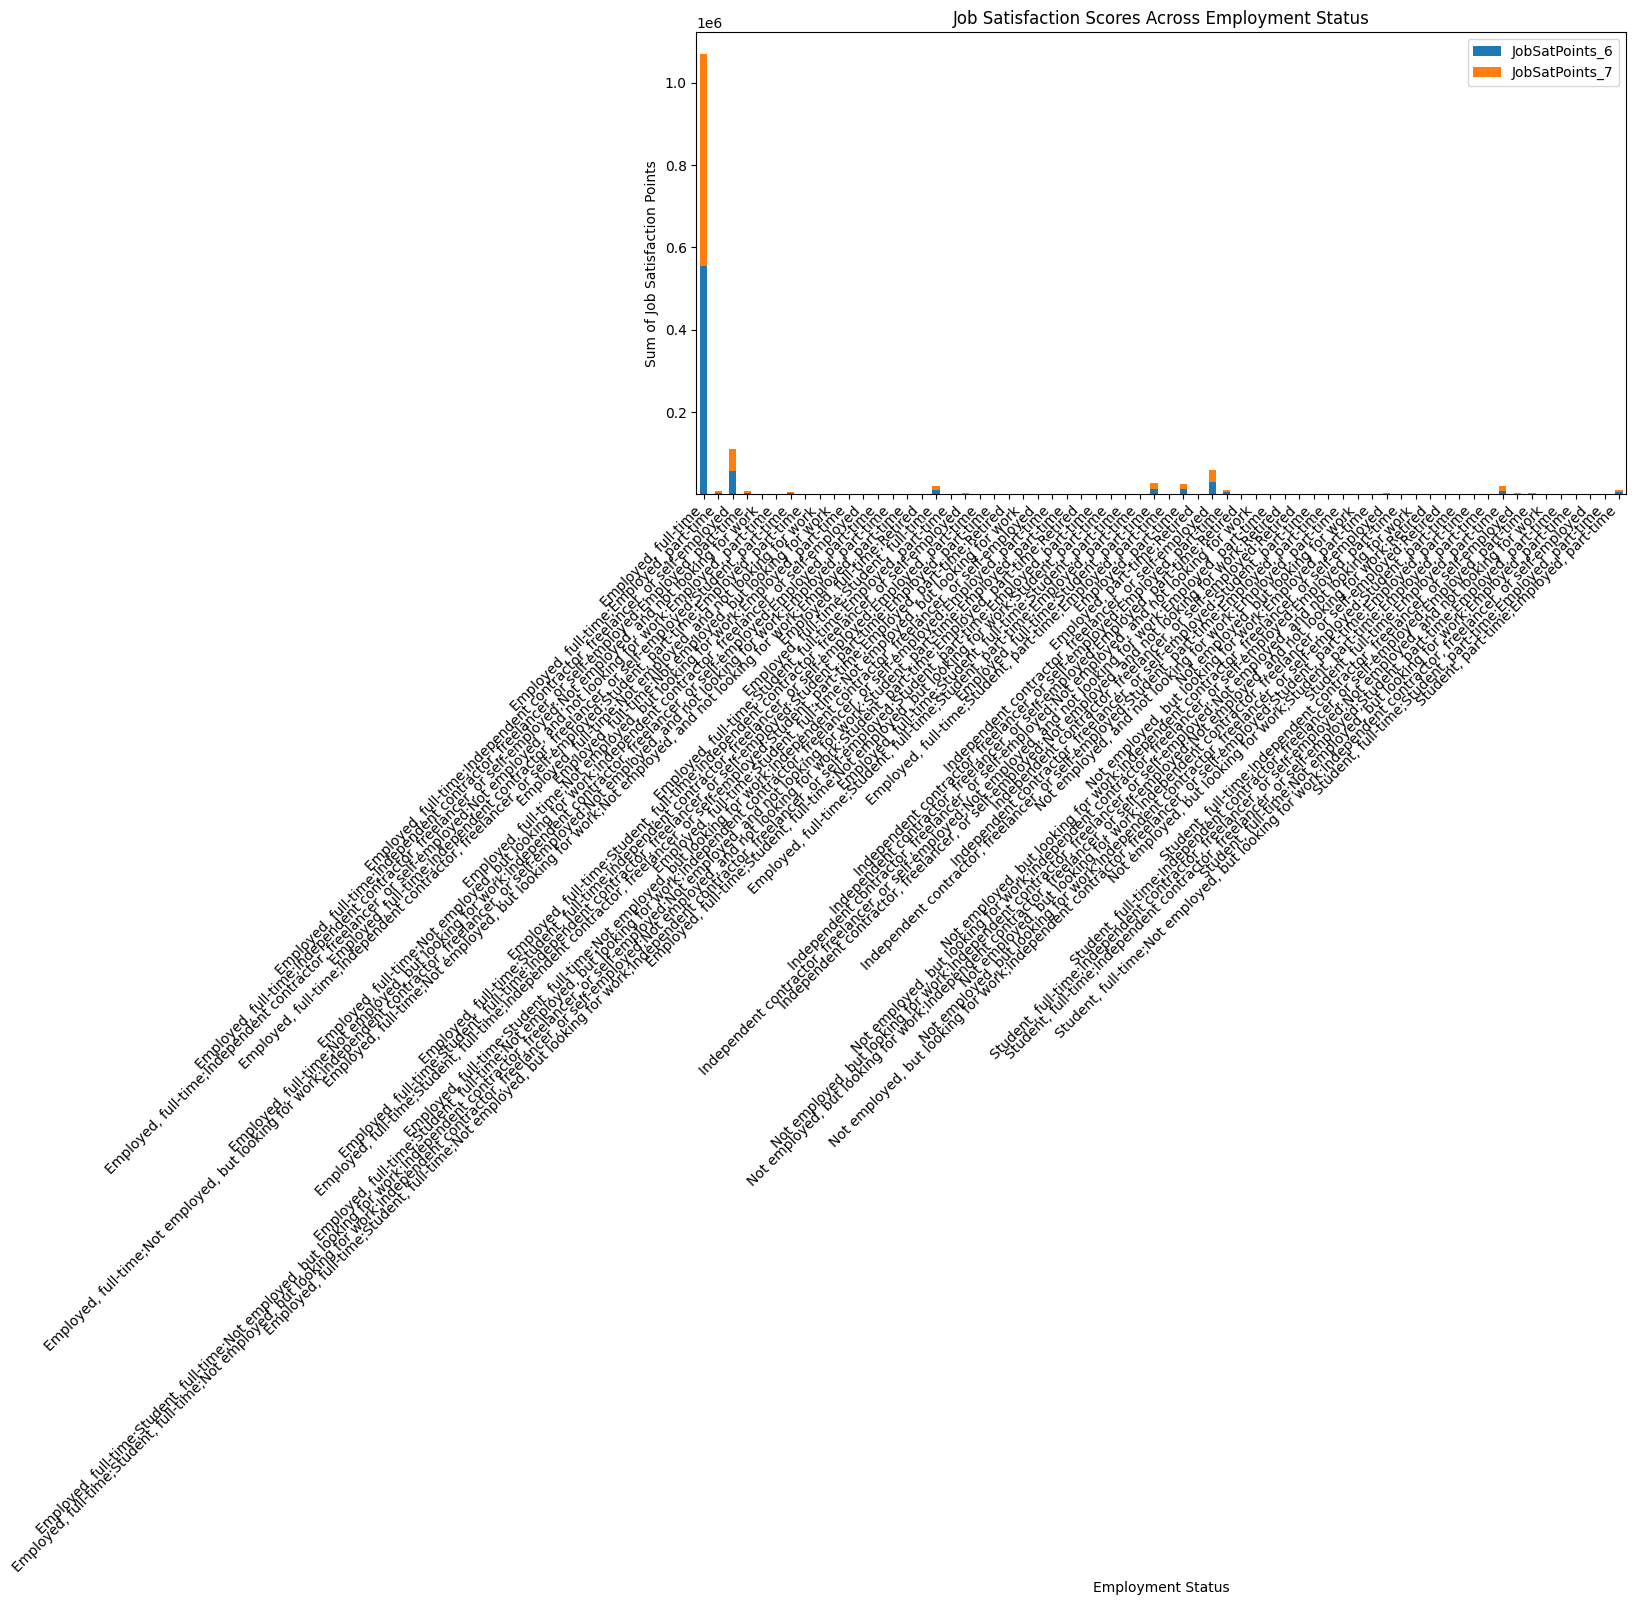

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data and prepare for stacked chart
df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by employment status and calculate sums
employment_job_sat = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

# Create stacked bar chart
employment_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

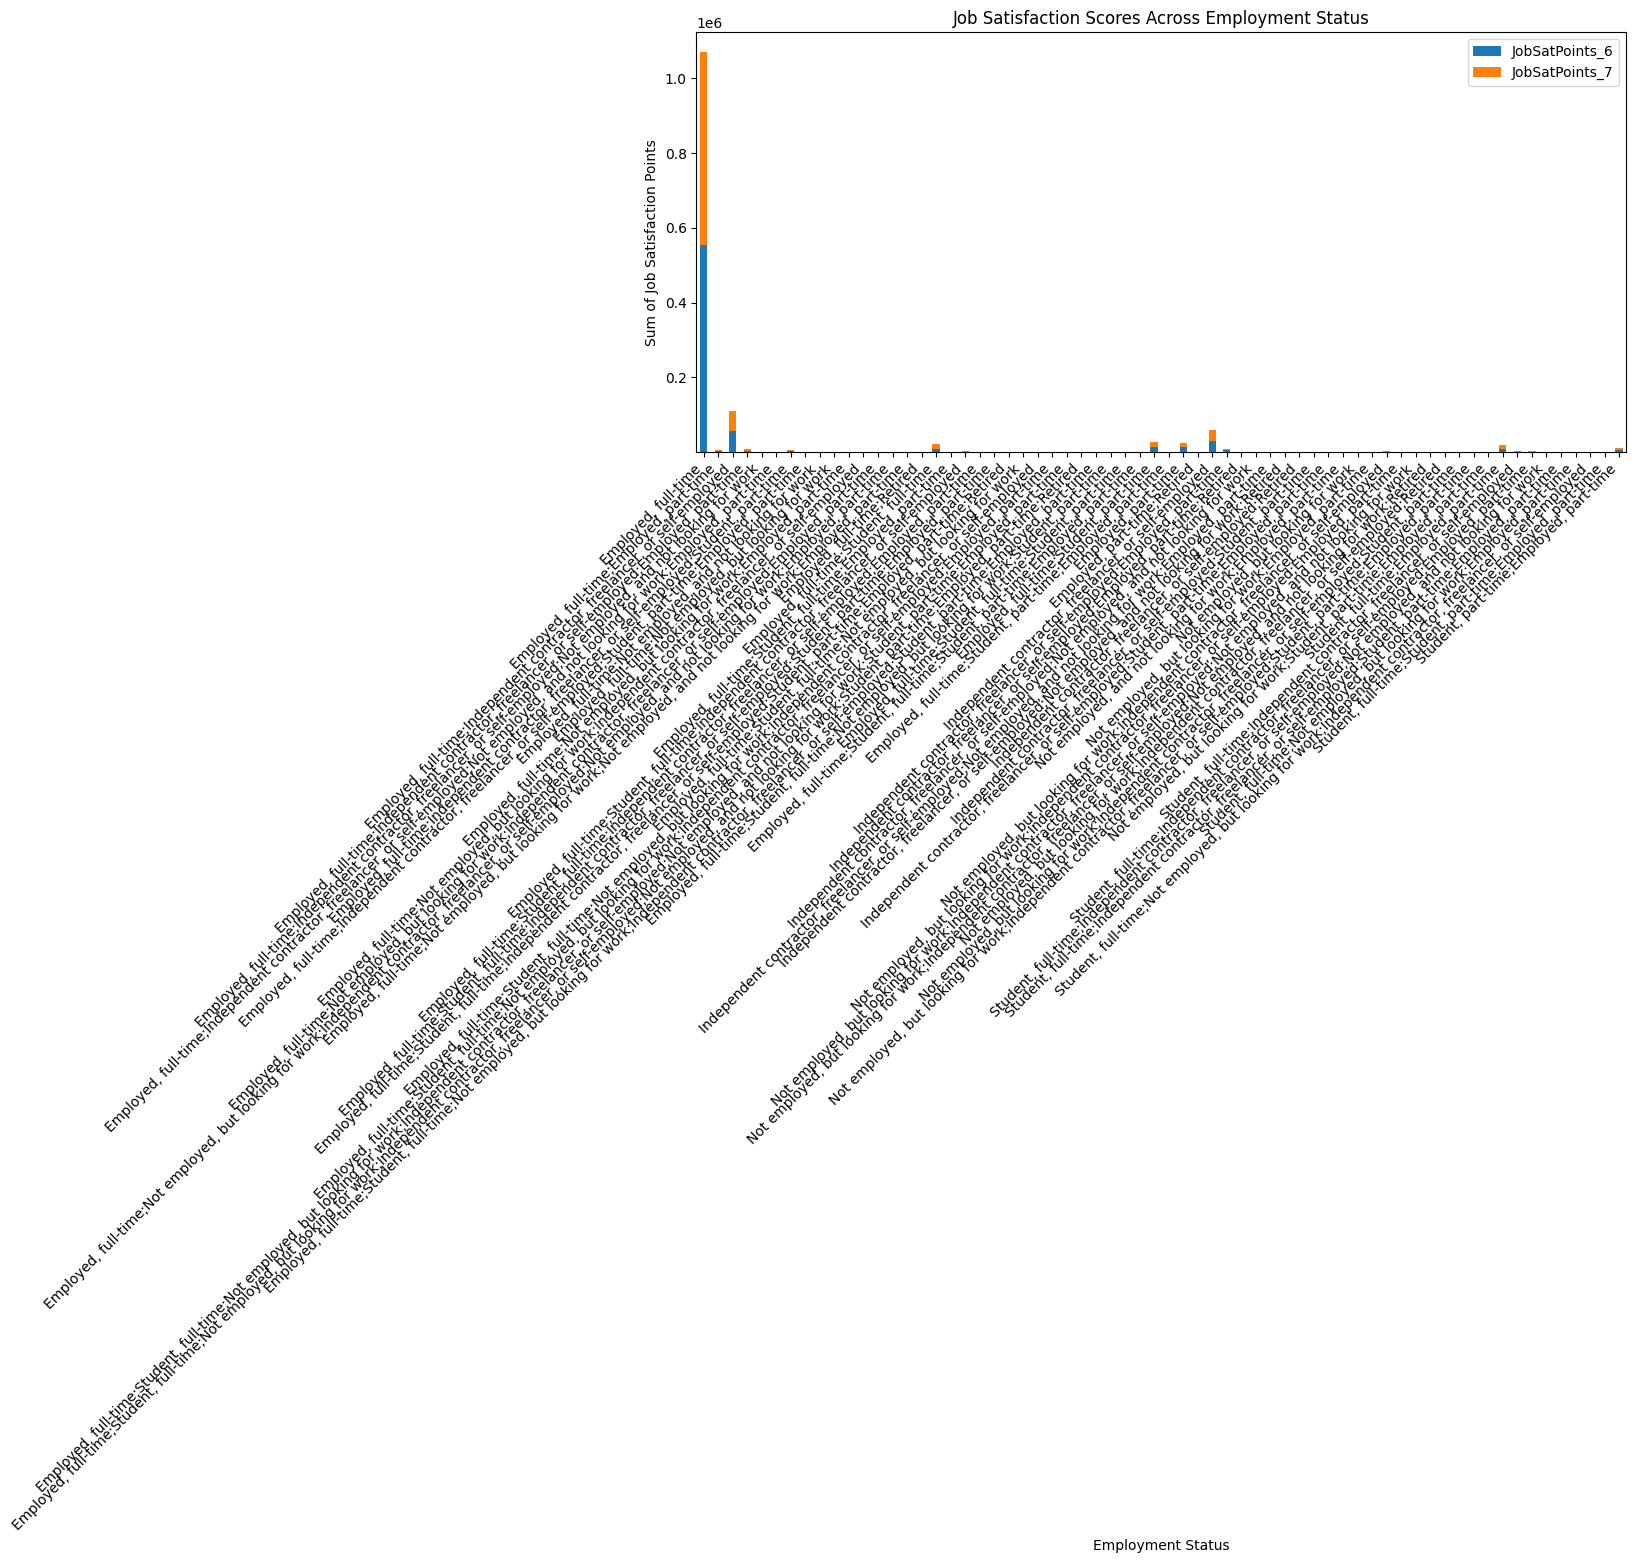

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

employment_job_sat = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

employment_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2, top=0.9) #adjust margins
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [23]:
# Stacked Chart of JobSatPoints_6 and JobSatPoints_7 for Employment Status
# Create a stacked chart to compare job satisfaction (JobSatPoints_6 and JobSatPoints_7) across different employment statuses. This will show how satisfaction varies by employment type.
#

# 就業狀況的 JobSatPoints_6 和 JobSatPoints_7 堆疊圖表
# 建立一個堆積圖來比較不同就業狀態下的工作滿意度（JobSatPoints_6 和 JobSatPoints_7）。
# 這將顯示出滿意度如何因就業類型而異。
#

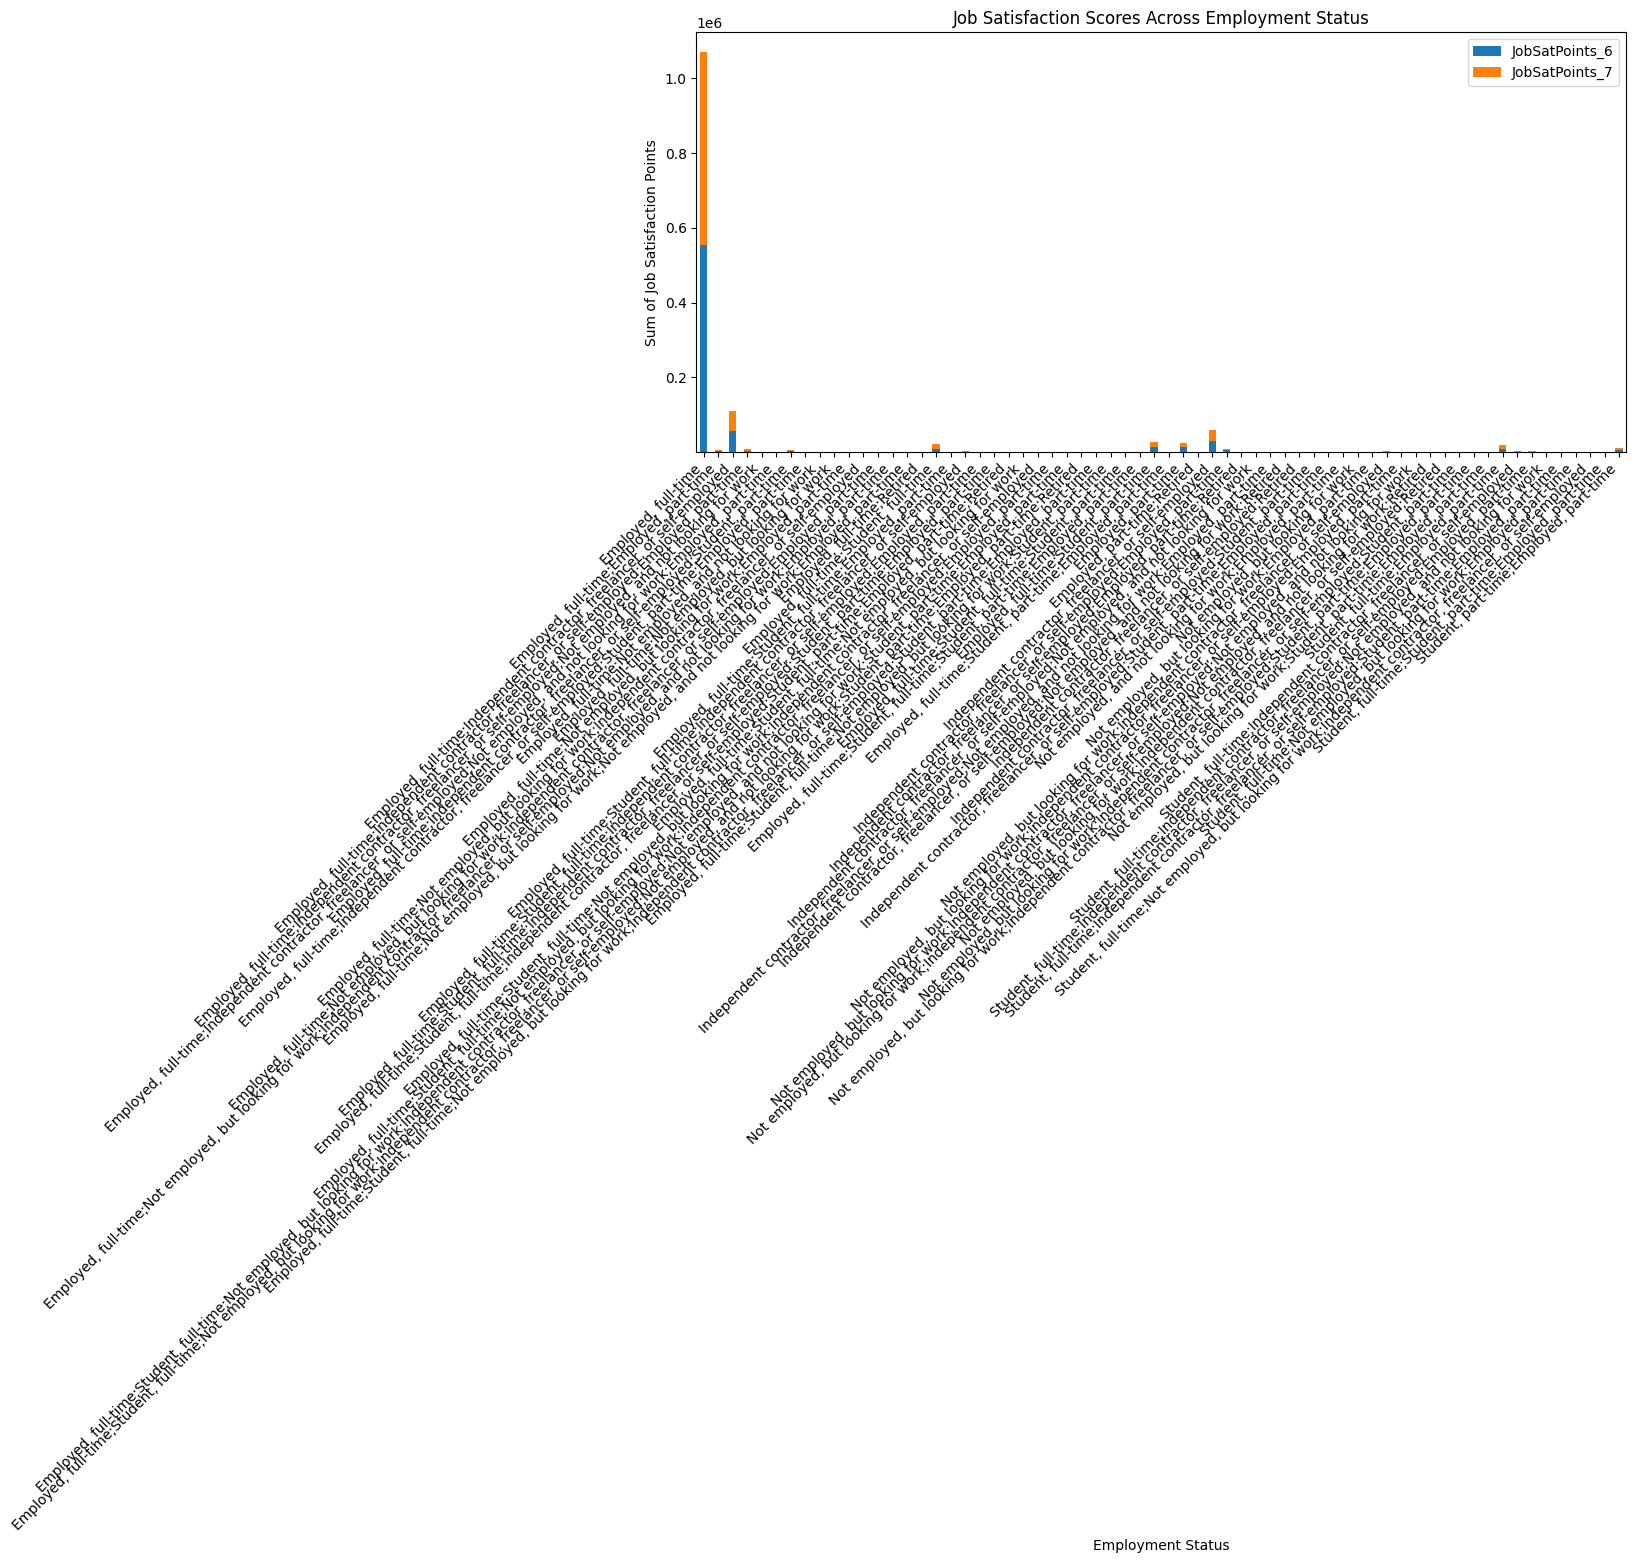

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

df_filtered = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

employment_job_sat = df_filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()

employment_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Job Satisfaction Scores Across Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Sum of Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.2, top=0.9) #adjust margins
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [25]:
# 任務 2：按年齡組別劃分的薪酬和工作滿意度堆積圖 
# 此堆積圖直觀地顯示了 30-35 歲受訪者的薪酬（ConvertedCompYearly）和工作滿意度（JobSatPoints_6）的組成。
#

In [26]:
QUERY = """
SELECT distinct Age
FROM main
WHERE -- Age = '25-34 years old'
  -- and 
  not ConvertedCompYearly = 'NaN'
  and not JobSatPoints_6 = 'NaN'
 ORDER by Age 
"""

df_job_Sat_by_Age = pd.read_sql_query(QUERY, conn)
print(df_job_Sat_by_Age)

                  Age
0     18-24 years old
1     25-34 years old
2     35-44 years old
3     45-54 years old
4     55-64 years old
5   65 years or older
6   Prefer not to say
7  Under 18 years old


In [27]:
QUERY = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age = '25-34 years old'
  and not ConvertedCompYearly = 'NaN'
  and not JobSatPoints_6 = 'NaN'
"""

df_job_Sat_by_Age = pd.read_sql_query(QUERY, conn)
print(df_job_Sat_by_Age)

                  Age  ConvertedCompYearly  JobSatPoints_6
0     25-34 years old             110000.0            20.0
1     25-34 years old              29000.0             0.0
2     25-34 years old              66592.0            30.0
3     25-34 years old             230000.0             0.0
4     25-34 years old             146496.0            30.0
...               ...                  ...             ...
7426  25-34 years old              17945.0             0.0
7427  25-34 years old              50000.0            25.0
7428  25-34 years old              62296.0             5.0
7429  25-34 years old              23256.0            40.0
7430  25-34 years old              44640.0             0.0

[7431 rows x 3 columns]


In [28]:
QUERY = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6, count(*) 
FROM main
WHERE Age = '25-34 years old'
  and not ConvertedCompYearly = 'NaN'
  and not JobSatPoints_6 = 'NaN'
GROUP BY Age, ConvertedCompYearly, JobSatPoints_6
ORDER BY Age, JobSatPoints_6, ConvertedCompYearly

  
"""

df_job_Sat_by_Age = pd.read_sql_query(QUERY, conn)
print(df_job_Sat_by_Age)

                  Age  ConvertedCompYearly  JobSatPoints_6  count(*)
0     25-34 years old                  1.0             0.0         3
1     25-34 years old                  7.0             0.0         1
2     25-34 years old                 10.0             0.0         1
3     25-34 years old                 13.0             0.0         1
4     25-34 years old                 14.0             0.0         1
...               ...                  ...             ...       ...
5333  25-34 years old             180000.0           100.0         1
5334  25-34 years old             200000.0           100.0         1
5335  25-34 years old             300000.0           100.0         1
5336  25-34 years old             712801.0           100.0         1
5337  25-34 years old           13818022.0           100.0         1

[5338 rows x 4 columns]


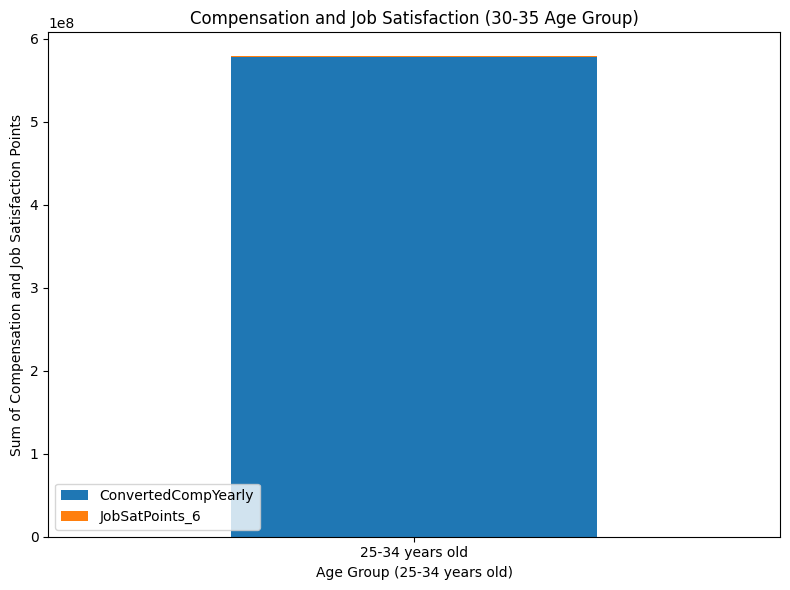

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data and filter for age group 30-35
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])
df_filtered = df_filtered[df_filtered['Age'] == '25-34 years old'] #Assuming 30-35 falls in this range.

# Group by age and calculate sums
age_comp_job_sat = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].sum()

# Create stacked bar chart
age_comp_job_sat.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Compensation and Job Satisfaction (30-35 Age Group)')
plt.xlabel('Age Group (25-34 years old)')
plt.ylabel('Sum of Compensation and Job Satisfaction Points')
plt.xticks(rotation=0) #only one bar, so no rotation needed.
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


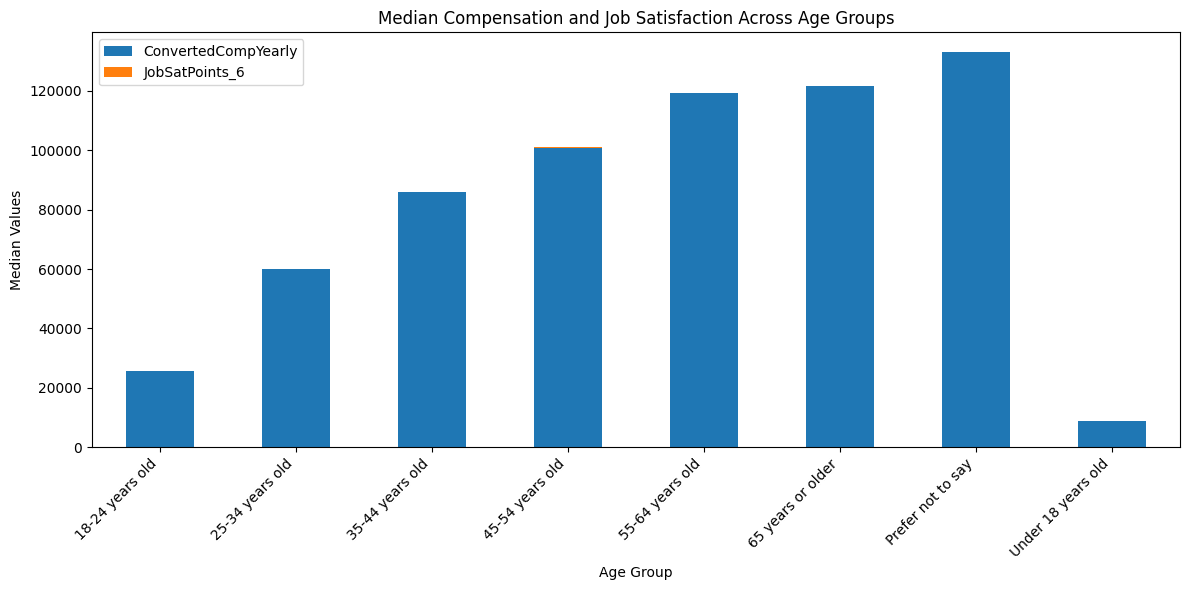

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age and calculate medians
age_comp_job_sat = df_filtered.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
})

# Create stacked bar chart
age_comp_job_sat.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_1499/1023894040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')


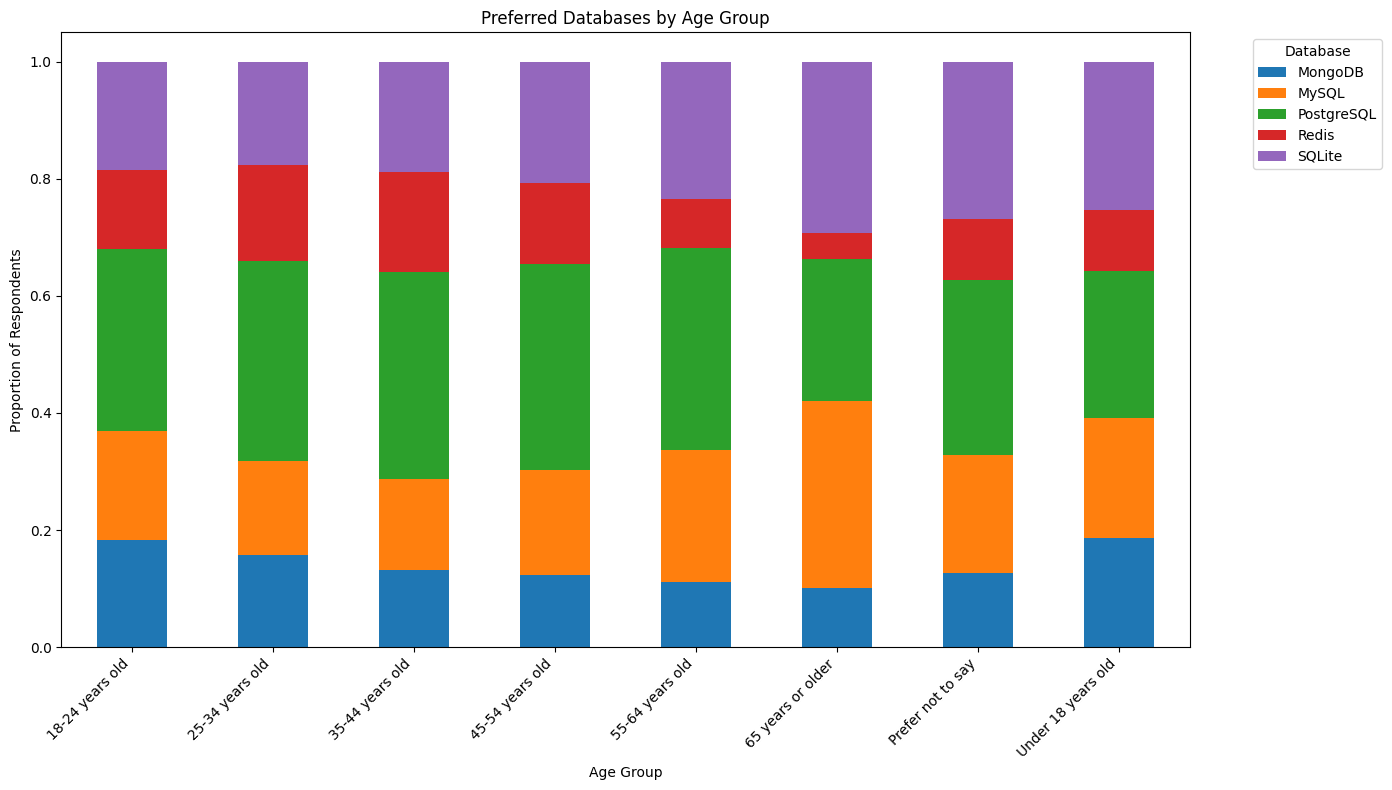

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

# Split databases
df_filtered['DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')

# Explode the list of databases
df_exploded = df_filtered.explode('DatabaseWantToWorkWith')

# Get top databases
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index.tolist()

# Filter for top databases
df_top_databases = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_databases)]

# Group by age and database, then count
age_database_counts = df_top_databases.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Normalize to proportions
age_database_proportions = age_database_counts.div(age_database_counts.sum(axis=1), axis=0)

# Create stacked bar chart
age_database_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

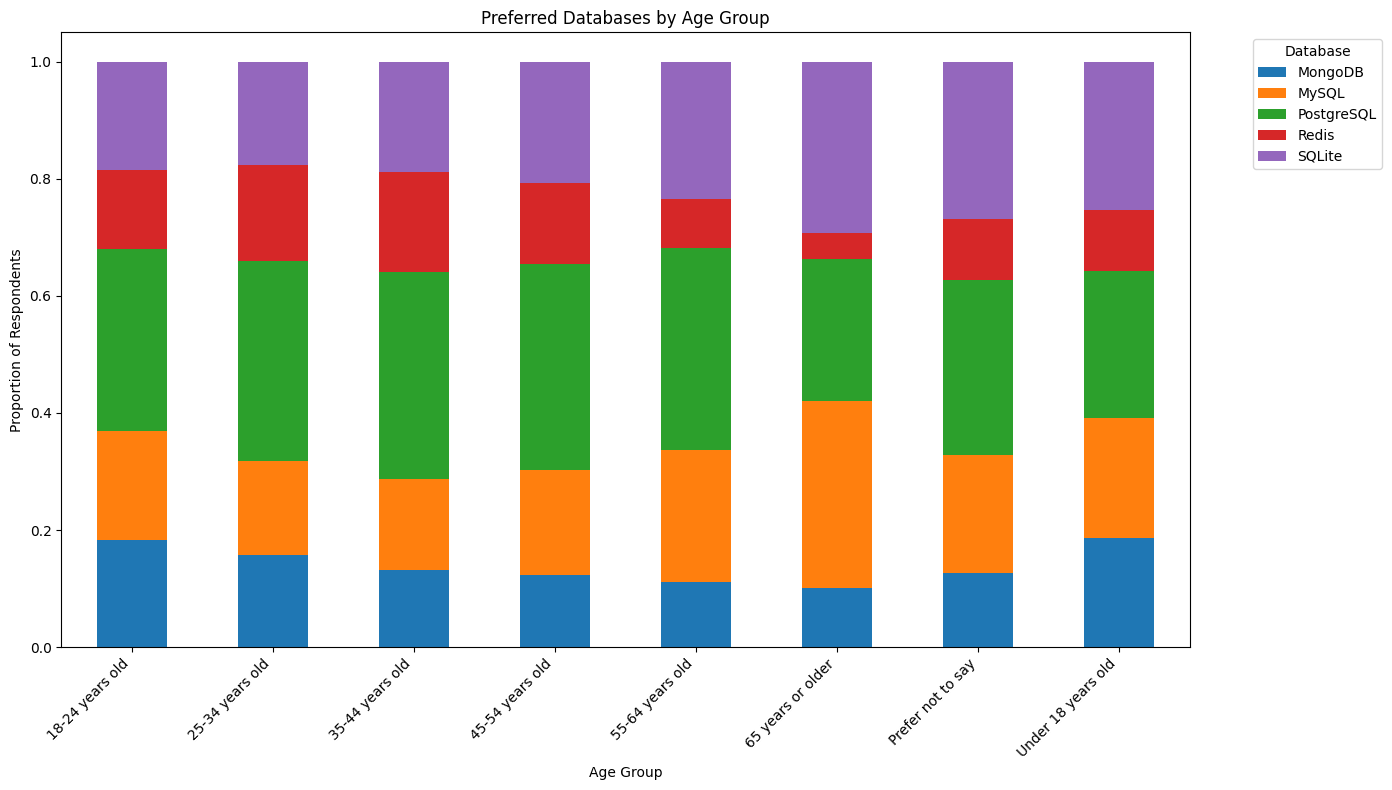

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'DatabaseWantToWorkWith']).copy() # explicitly create a copy

# Split databases using .loc
df_filtered.loc[:, 'DatabaseWantToWorkWith'] = df_filtered['DatabaseWantToWorkWith'].str.split(';')

# Explode the list of databases
df_exploded = df_filtered.explode('DatabaseWantToWorkWith')

# Get top databases
top_databases = df_exploded['DatabaseWantToWorkWith'].value_counts().head(5).index.tolist()

# Filter for top databases
df_top_databases = df_exploded[df_exploded['DatabaseWantToWorkWith'].isin(top_databases)]

# Group by age and database, then count
age_database_counts = df_top_databases.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Normalize to proportions
age_database_proportions = age_database_counts.div(age_database_counts.sum(axis=1), axis=0)

# Create stacked bar chart
age_database_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


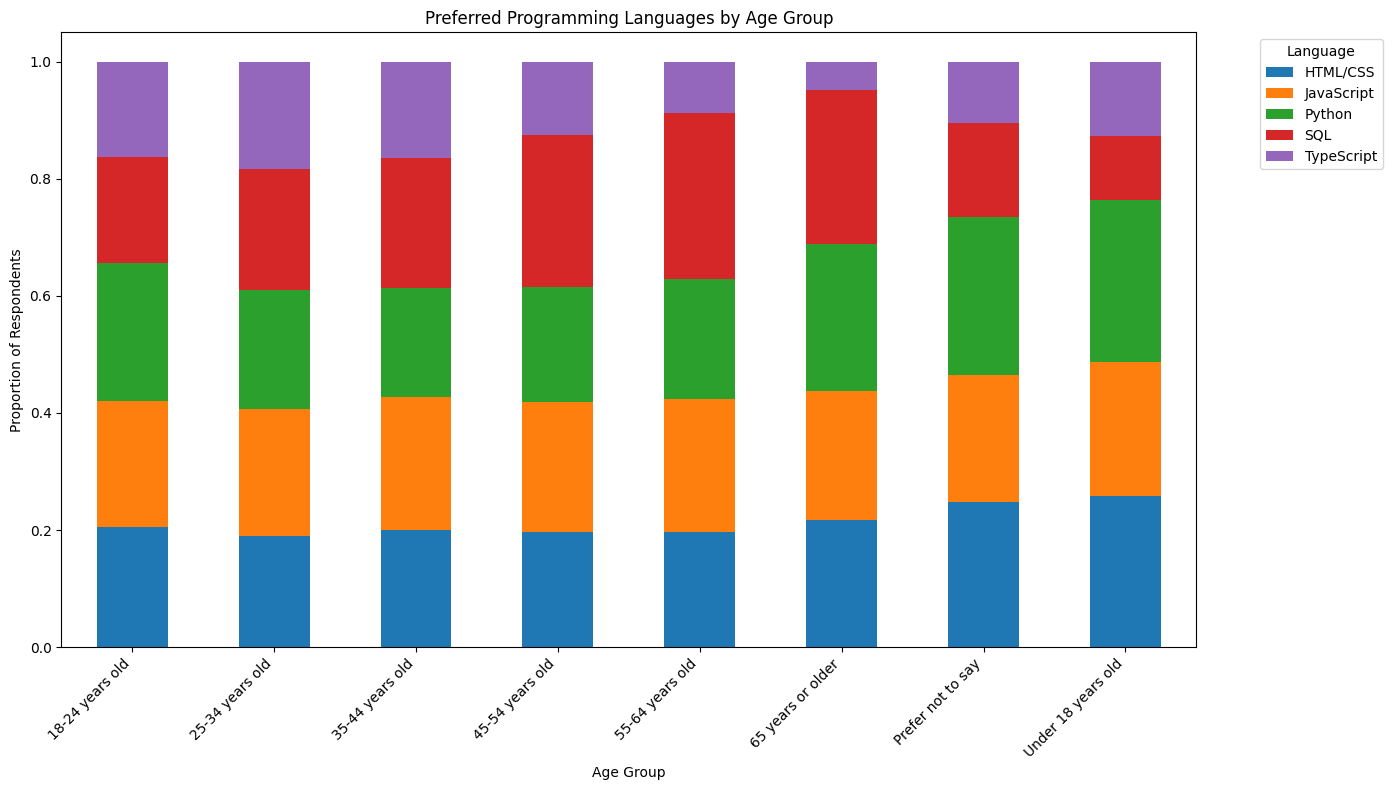

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Age', 'LanguageAdmired']).copy()

# Split languages
df_filtered.loc[:, 'LanguageAdmired'] = df_filtered['LanguageAdmired'].str.split(';')

# Explode the list of languages
df_exploded = df_filtered.explode('LanguageAdmired')

# Get top languages
top_languages = df_exploded['LanguageAdmired'].value_counts().head(5).index.tolist()

# Filter for top languages
df_top_languages = df_exploded[df_exploded['LanguageAdmired'].isin(top_languages)]

# Group by age and language, then count
age_language_counts = df_top_languages.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Normalize to proportions
age_language_proportions = age_language_counts.div(age_language_counts.sum(axis=1), axis=0)

# Create stacked bar chart
age_language_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_1499/3248315141.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


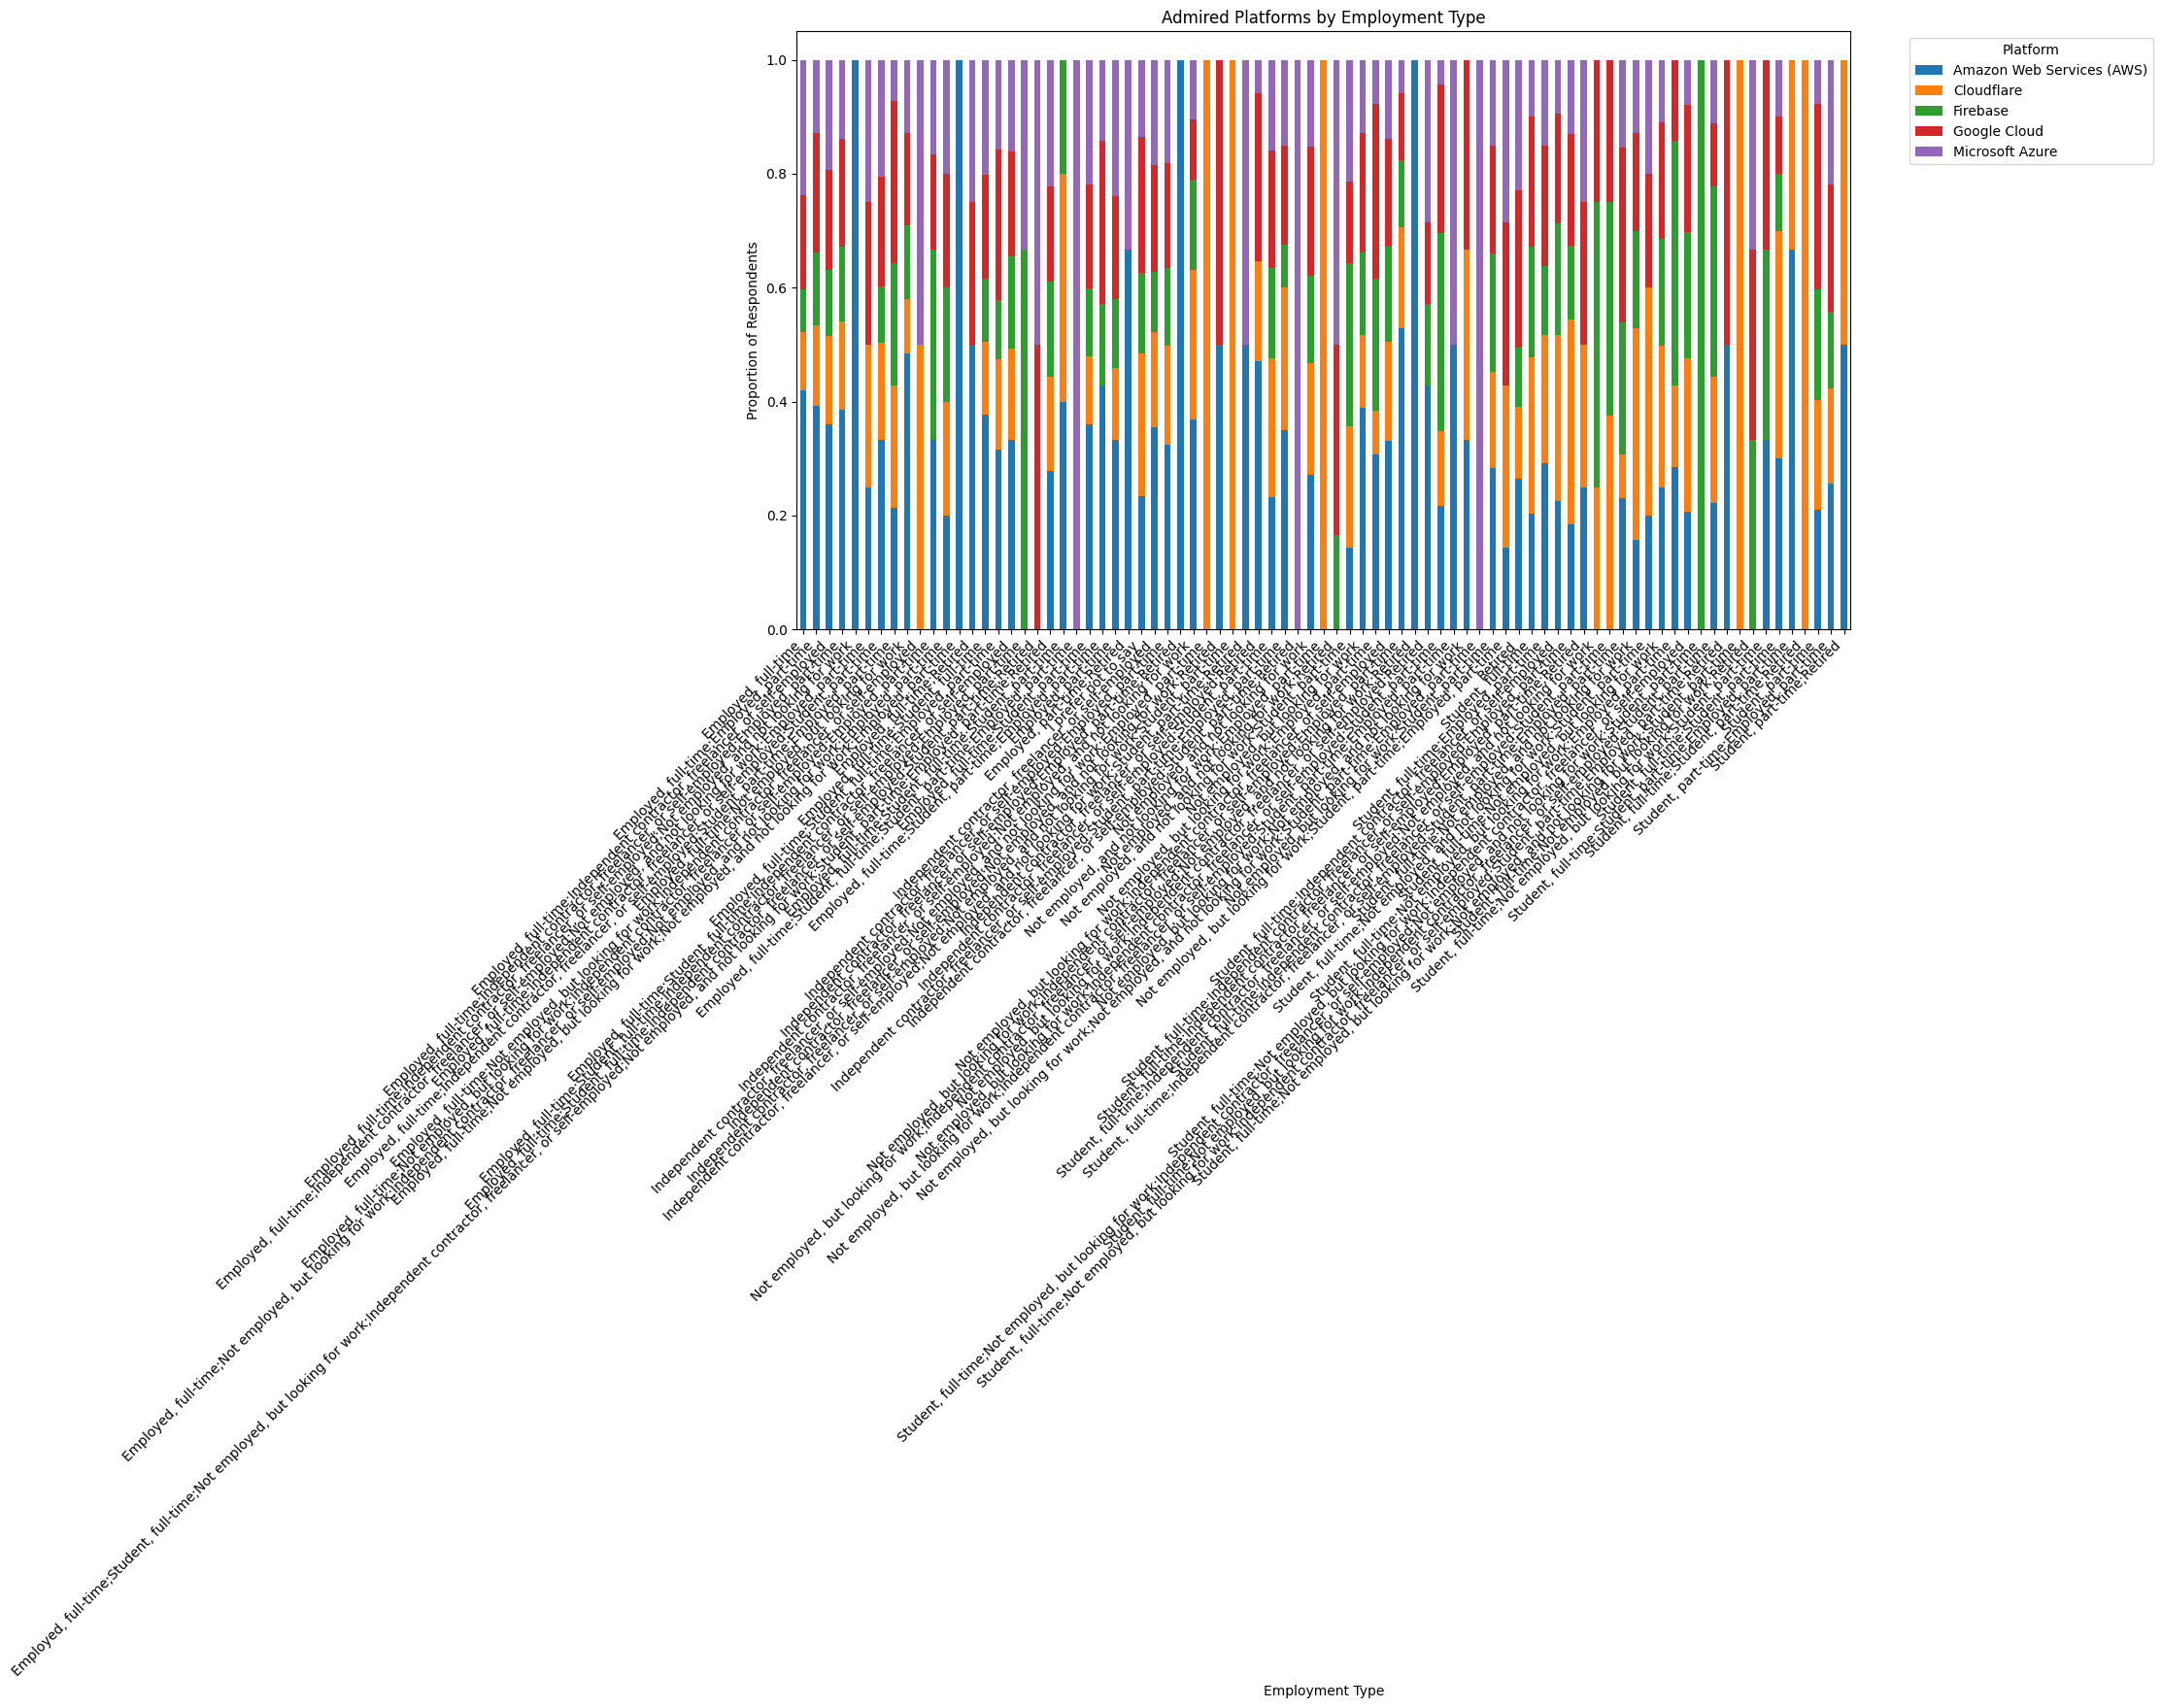

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# Split platforms
df_filtered.loc[:, 'PlatformAdmired'] = df_filtered['PlatformAdmired'].str.split(';')

# Explode the list of platforms
df_exploded = df_filtered.explode('PlatformAdmired')

# Get top platforms
top_platforms = df_exploded['PlatformAdmired'].value_counts().head(5).index.tolist()

# Filter for top platforms
df_top_platforms = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Group by employment and platform, then count
employment_platform_counts = df_top_platforms.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Normalize to proportions
employment_platform_proportions = employment_platform_counts.div(employment_platform_counts.sum(axis=1), axis=0)

# Create stacked bar chart
employment_platform_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 
# case 2
#

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey-data.csv")

# Clean data
df_filtered = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()

# Split platforms
df_filtered.loc[:, 'PlatformAdmired'] = df_filtered['PlatformAdmired'].str.split(';')

# Explode the list of platforms
df_exploded = df_filtered.explode('PlatformAdmired')

# Get top platforms
top_platforms = df_exploded['PlatformAdmired'].value_counts().head(5).index.tolist()

# Filter for top platforms
df_top_platforms = df_exploded[df_exploded['PlatformAdmired'].isin(top_platforms)]

# Group by employment and platform, then count
employment_platform_counts = df_top_platforms.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Normalize to proportions
employment_platform_proportions = employment_platform_counts.div(employment_platform_counts.sum(axis=1), axis=0)

# Create stacked bar chart
# employment_platform_proportions.plot(kind='bar', stacked=True, figsize=(14, 8))
employment_platform_proportions.plot(kind='bar', stacked=True, figsize=(18, 12)) # Increased figure size


# plt.title('Admired Platforms by Employment Type')
# plt.xlabel('Employment Type')
# plt.ylabel('Proportion of Respondents')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Admired Platforms by Employment Type', fontsize=12) #reduce fontsize
plt.xlabel('Employment Type', fontsize=10) #reduce fontsize
plt.ylabel('Proportion of Respondents', fontsize=10) #reduce fontsize
plt.xticks(rotation=45, ha='right', fontsize=8) #reduce fontsize
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8) #reduce fontsize

plt.subplots_adjust(bottom=0.2, top=0.9) #adjust margins
plt.xticks(rotation=90, ha='right') # or rotation = 'vertical'
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) #Show a max of 8 ticks
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)

plt.tight_layout()
plt.show()